In [2]:
import fastai
from fastai import *          # Quick access to most common functionality
from fastai.vision import *   # Quick access to computer vision functionality

# Vision example

Images can be in labeled folders, or a single folder with a CSV.

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/mediumnok/.fastai/data/mnist_sample')

In [97]:
ls $path

labels.csv  models/  sample/  train/  valid/


In [19]:
path_sample = path/'sample'

In [75]:
import shutil

In [ ]:
# Copy 50 images for each class to a subfolder 'sample/'
for paths in (path/'train').glob('*'):
    
    sample_path = Path('/' + '/'.join([*paths.parts[1:-2], ('sample'),*paths.parts[-2:]])) # To hack a sample sub-folder
    sample_path.mkdir(exist_ok=True,parents=True)
    for subpath in np.random.permutation(list(paths.glob('*')))[:50]:
              shutil.copy(subpath, sample_path/subpath.parts[-1])
        

In [100]:
# Copy 50 images for each class to a subfolder 'sample/'
for paths in (path/'valid').glob('*'):
    
    sample_path = Path('/' + '/'.join([*paths.parts[1:-2], ('sample'),*paths.parts[-2:]])) # To hack a sample sub-folder
    sample_path.mkdir(exist_ok=True,parents=True)
    for subpath in np.random.permutation(list(paths.glob('*')))[:50]:
              shutil.copy(subpath, sample_path/subpath.parts[-1])
        

### Image folder version

Create a `DataBunch`, optionally with transforms:

In [101]:
data = ImageDataBunch.from_folder(path_sample, ds_tfms=(rand_pad(2, 28), []), bs=64)
data.normalize(imagenet_stats)
img,label = data.train_ds[0]
img

Create and fit a `Learner`:

In [102]:
learn = ConvLearner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1, 0.01)

epoch,train_loss,valid_loss,accuracy


ZeroDivisionError: division by zero

In [5]:
accuracy(*learn.get_preds())

tensor(0.9956)

### CSV version

Same as above, using CSV instead of folder name for labels

In [10]:
!tree -d $path

/home/mediumnok/.fastai/data/mnist_sample
├── models
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

7 directories


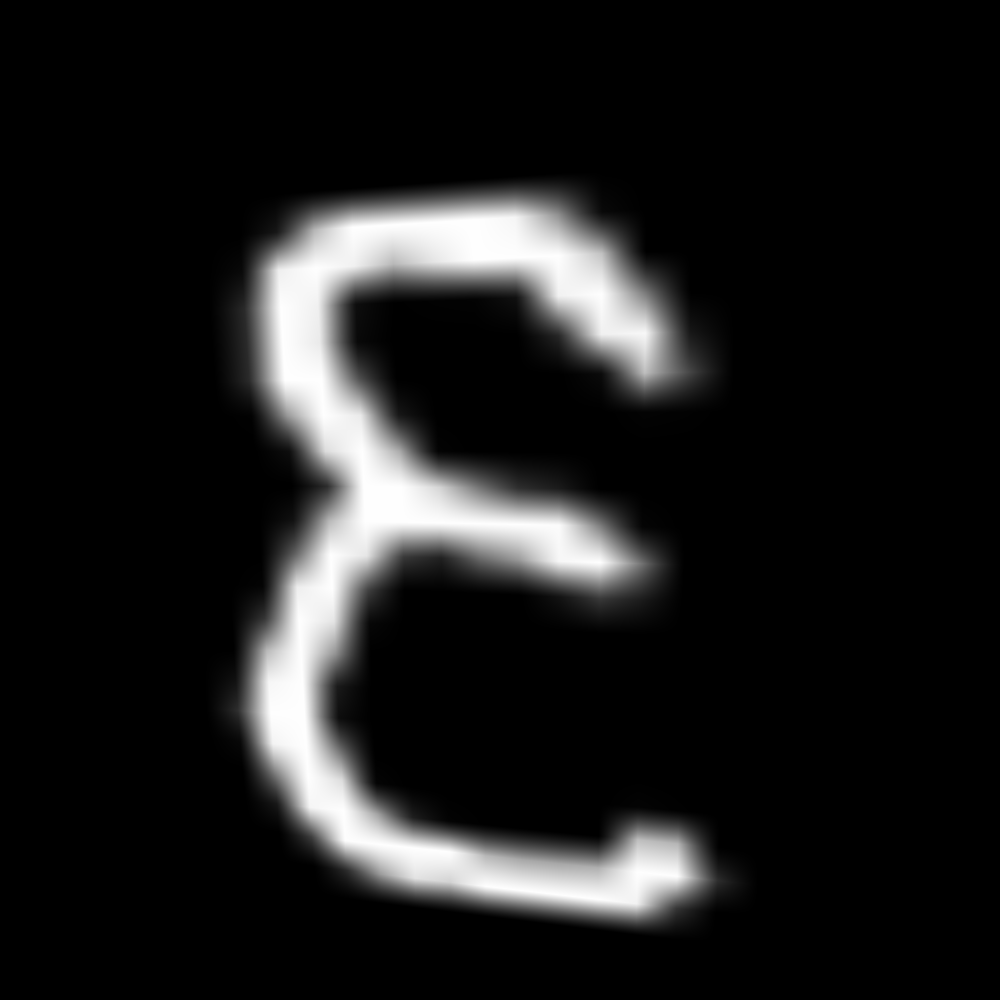

In [76]:
data = ImageDataBunch.from_csv(path, ds_tfms=get_transforms(), bs=12, size=1000)
data.normalize(imagenet_stats)
img,label = data.train_ds[0]
img

In [71]:
tmp =data.train_dl

In [72]:
x,y = next(iter(tmp))

In [73]:
x.shape

torch.Size([12, 3, 28, 28])

In [74]:
data.train_dl.dl.dataset??

Type:        ImageClassificationDataset
String form: ImageClassificationDataset of len 11511
Length:      11511
File:        ~/fastai/examples/fastai/vision/data.py
Source:     
class ImageClassificationDataset(ImageDataset):
    "`Dataset` for folders of images in style {folder}/{class}/{images}."
    def __init__(self, fns:FilePathList, labels:ImgLabels, classes:Optional[Classes]=None):
        self.classes = ifnone(classes, list(set(labels)))
        self.class2idx = {v:k for k,v in enumerate(self.classes)}
        y = np.array([self.class2idx[o] for o in labels], dtype=np.int64)
        super().__init__(fns, y)
        self.loss_func = F.cross_entropy

    @staticmethod
    def _folder_files(folder:Path, label:ImgLabel, check_ext=True)->Tuple[FilePathList,ImgLabels]:
        "From `folder` return image files and labels. The labels are all `label`. `check_ext` means only image files."
        fnames = get_image_files(folder, check_ext=check_ext)
        return fnames,[label]*len(fna

In [7]:
learn = ConvLearner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1, 0.01)

Total time: 00:08
epoch  train loss  valid loss  accuracy
1      0.050554    0.013187    0.995134  (00:08)

